<a href="https://colab.research.google.com/github/tlsdmswn01/NLP_Project---Audio/blob/main/_%EC%98%A4%EB%94%94%EC%98%A4_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [ ]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-2-99cc85cc827f>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정

* http://suanlab.com/datasets/GeneralMidi.wav



In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=b6108f83542f5fafbbe0e08d2293c106dddce11af456cb298355d481f2391946
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

url = "http://suanlab.com/datasets/GeneralMidi.wav"
midi_file=wget.download(url)

* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재

* 해당 예제에서는 일부 악기만 선택해서 사용

In [ ]:
midi_file

'GeneralMidi.wav'

In [ ]:
instruments = [0,10,20,30,40,50,60,70,80,90] #악기 번호
num_notes=50 # 음이 50개
sec=2

audio=[]
inst=[]


# offset : 현재 instruments가 무엇인가에 따라서 거기서부터 2초
# 악기 하나당 50개의 음을 가진 것으로 해서 데이터를 가져오기
for inst_idx, note in itertools.product(range(len(instruments)),range(num_notes)):
    instrument= instruments[inst_idx]
    offset=(instrument*num_notes*sec)+ (note*sec)
    print('instruments:{},note:{},offset:{}'.format(instrument,note,offset))
    y,sr=librosa.load(midi_file,sr=None, offset=offset,duration=2.0)
    audio.append(y)
    inst.append(inst_idx)


instruments:0,note:0,offset:0
instruments:0,note:1,offset:2
instruments:0,note:2,offset:4
instruments:0,note:3,offset:6
instruments:0,note:4,offset:8
instruments:0,note:5,offset:10
instruments:0,note:6,offset:12
instruments:0,note:7,offset:14
instruments:0,note:8,offset:16
instruments:0,note:9,offset:18
instruments:0,note:10,offset:20
instruments:0,note:11,offset:22
instruments:0,note:12,offset:24
instruments:0,note:13,offset:26
instruments:0,note:14,offset:28
instruments:0,note:15,offset:30
instruments:0,note:16,offset:32
instruments:0,note:17,offset:34
instruments:0,note:18,offset:36
instruments:0,note:19,offset:38
instruments:0,note:20,offset:40
instruments:0,note:21,offset:42
instruments:0,note:22,offset:44
instruments:0,note:23,offset:46
instruments:0,note:24,offset:48
instruments:0,note:25,offset:50
instruments:0,note:26,offset:52
instruments:0,note:27,offset:54
instruments:0,note:28,offset:56
instruments:0,note:29,offset:58
instruments:0,note:30,offset:60
instruments:0,note:31,o

In [ ]:
audio[0].shape

(88200,)

In [ ]:
audio_np

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.0517578e-05, -3.0517578e-05, -3.0517578e-05],
       [-3.0517578e-05, -3.0517578e-05, -3.0517578e-05, ...,
        -3.0517578e-05, -3.0517578e-05, -3.0517578e-05],
       [-1.5258789e-05, -1.5258789e-05, -1.5258789e-05, ...,
        -1.5258789e-05, -1.5258789e-05, -1.5258789e-05],
       ...,
       [-3.0517578e-05, -3.0517578e-05, -3.0517578e-05, ...,
        -1.5258789e-05, -1.5258789e-05, -1.5258789e-05],
       [-1.5258789e-05, -1.5258789e-05, -1.5258789e-05, ...,
        -1.5258789e-05, -1.5258789e-05, -1.5258789e-05],
       [-1.5258789e-05, -1.5258789e-05, -1.5258789e-05, ...,
        -1.5258789e-05, -1.5258789e-05, -1.5258789e-05]], dtype=float32)

In [ ]:
import numpy as np

audio_np= np.array(audio,np.float32)
inst_np = np.array(inst,np.int16)

print(audio_np.shape,inst_np.shape)

(500, 88200) (500,)


(88200,)

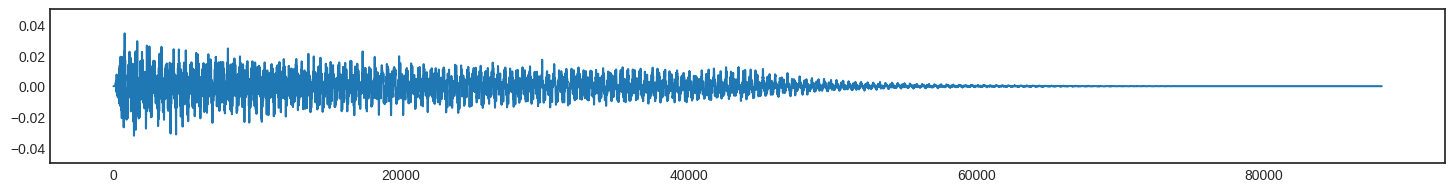

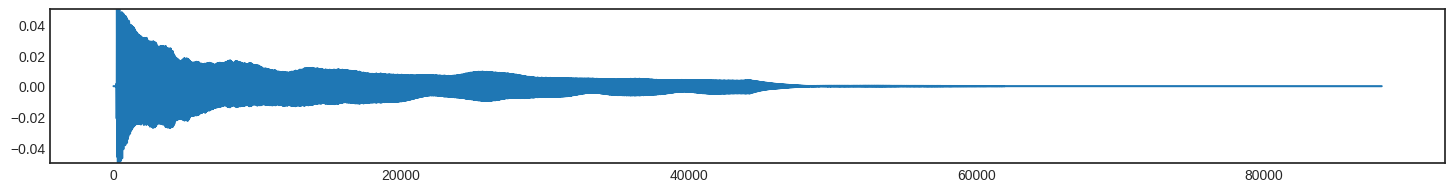

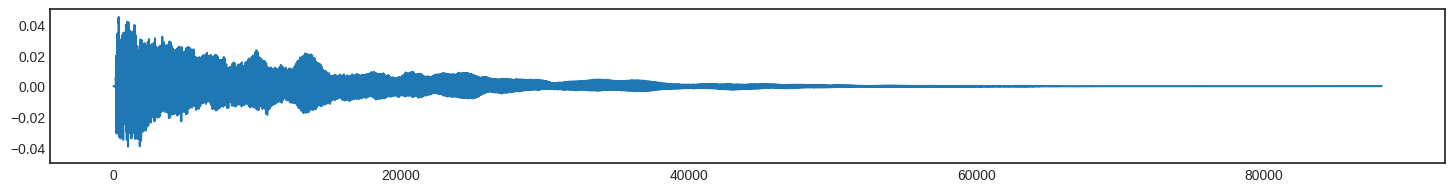

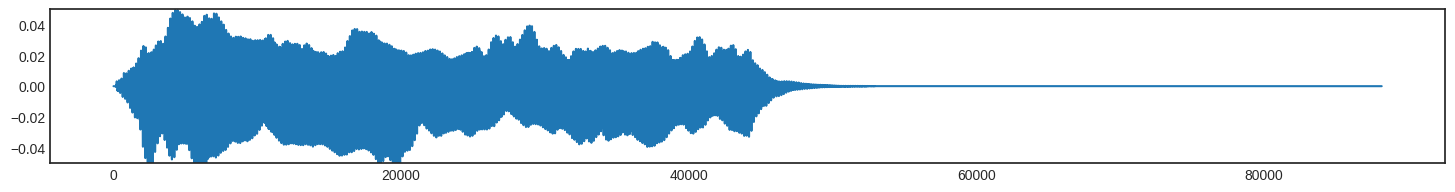

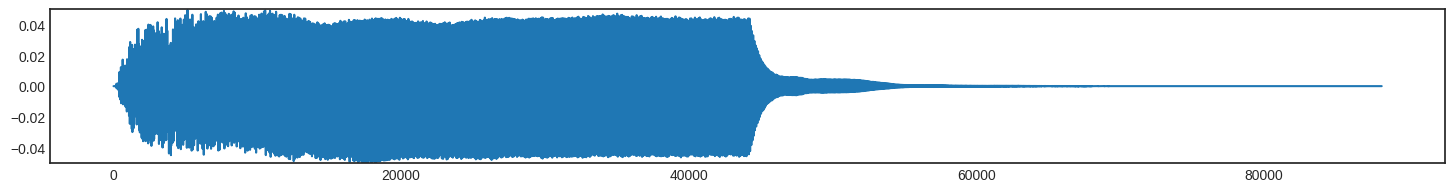

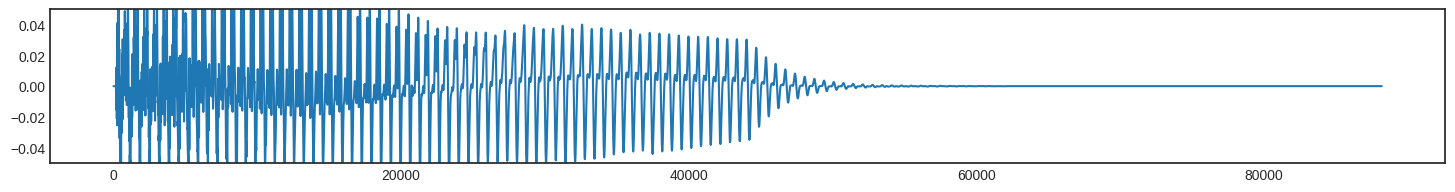

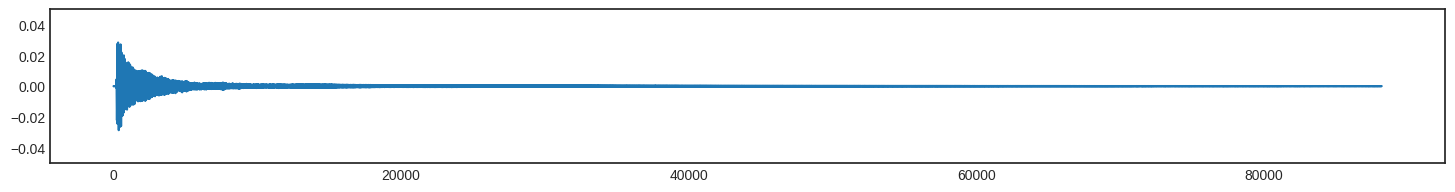

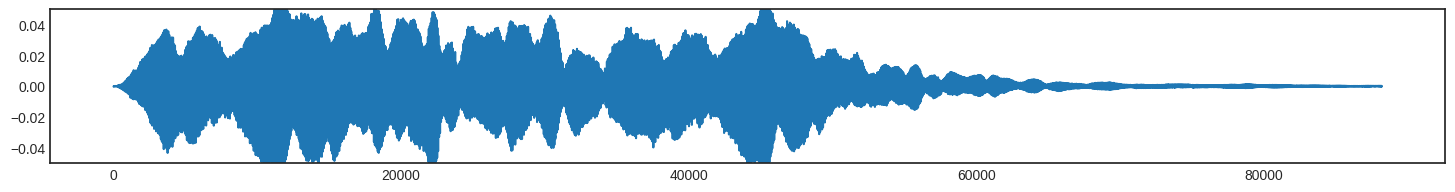

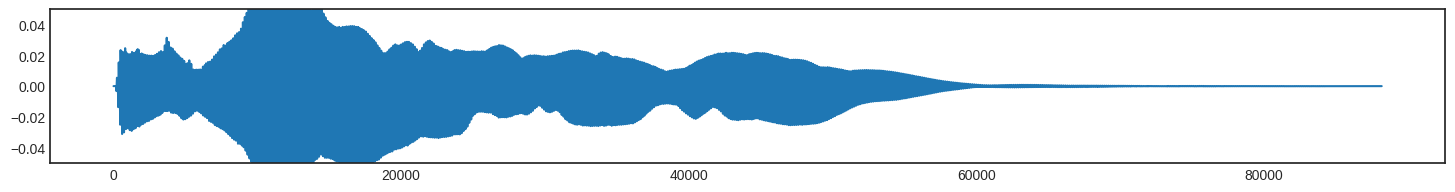

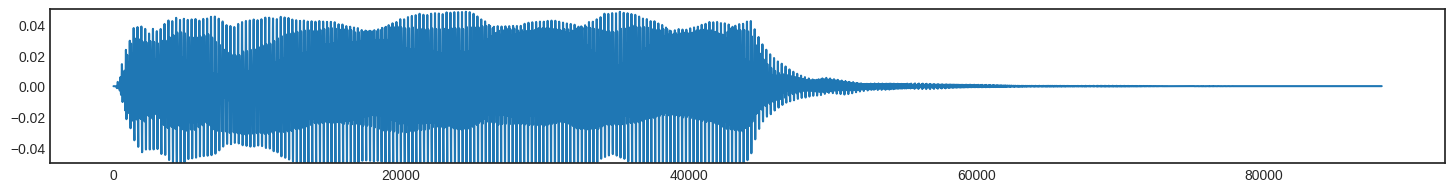

In [ ]:
# 악기의 종류에 따라서 소리의 형태가 조금씩 다름을 확인할 수 있다.
# 우리는 현재 악기 10개 종류만 사
for idx in  range(0,len(audio_np),num_notes):
    plt.figure(figsize=(18,2))
    plt.plot(audio_np[idx])
    plt.ylim((-0.05,0.05))
    plt.show()

In [ ]:
print(inst_np[0])
ipd.Audio(audio_np[0],rate=sr)

0


In [ ]:
print(inst_np[50])
ipd.Audio(audio_np[50],rate=sr)

1


In [ ]:
print(inst_np[100])
ipd.Audio(audio_np[100],rate=sr)

2


In [ ]:
print(inst_np[300])
ipd.Audio(audio_np[300],rate=sr)

6


In [ ]:
print(inst_np[100])
ipd.Audio(audio_np[100],rate=sr)

2


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler()

In [ ]:
audio_np

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.0517578e-05, -3.0517578e-05, -3.0517578e-05],
       [-3.0517578e-05, -3.0517578e-05, -3.0517578e-05, ...,
        -3.0517578e-05, -3.0517578e-05, -3.0517578e-05],
       [-1.5258789e-05, -1.5258789e-05, -1.5258789e-05, ...,
        -1.5258789e-05, -1.5258789e-05, -1.5258789e-05],
       ...,
       [-3.0517578e-05, -3.0517578e-05, -3.0517578e-05, ...,
        -1.5258789e-05, -1.5258789e-05, -1.5258789e-05],
       [-1.5258789e-05, -1.5258789e-05, -1.5258789e-05, ...,
        -1.5258789e-05, -1.5258789e-05, -1.5258789e-05],
       [-1.5258789e-05, -1.5258789e-05, -1.5258789e-05, ...,
        -1.5258789e-05, -1.5258789e-05, -1.5258789e-05]], dtype=float32)

## Constant-Q를 이용한 머신러닝 오디오 분류

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리

*   주파수 대역을 저장할 리스트 `audio_cqt` 선언
*   constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
*   해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
*   여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환




*   변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
*   여기서 `n_bins`는 옥타브 단계 및 개수를, `bins_per_octave`는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용



In [ ]:
audio_cqt=[]
for y in audio:
    ret=librosa.cqt(y,hop_length=1024,n_bins=24*7,bins_per_octave=24)
    ret=np.abs(ret)
    audio_cqt.append(ret)


In [ ]:
audio_cqt[11].shape

(168, 87)

* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

<ipython-input-16-22f588d9dd22>:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(amp_db,sr=sr,x_axis='time',y_axis='cqt_note')


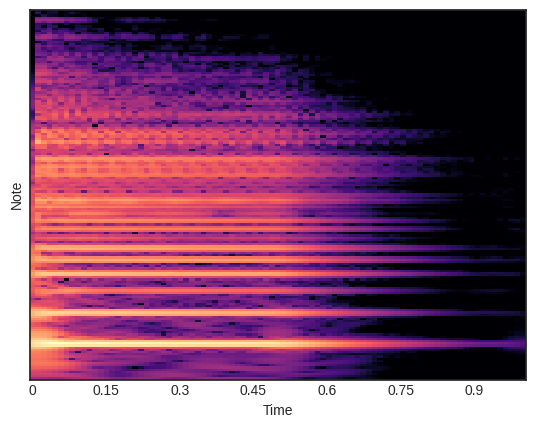

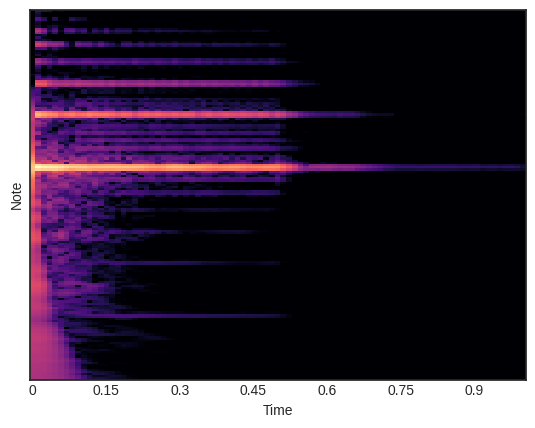

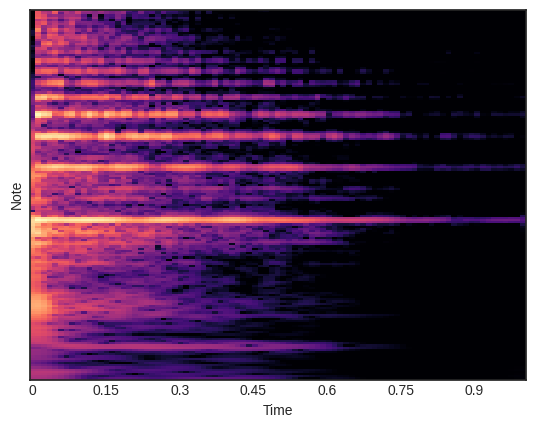

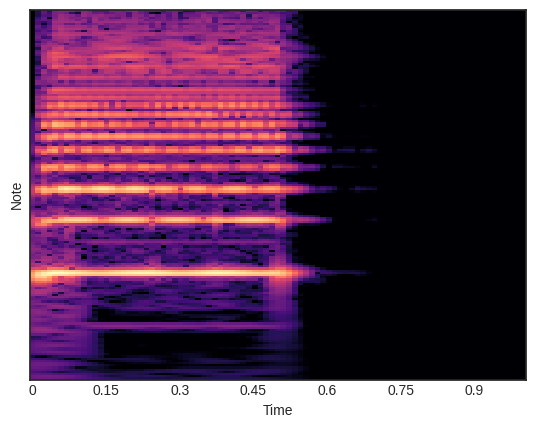

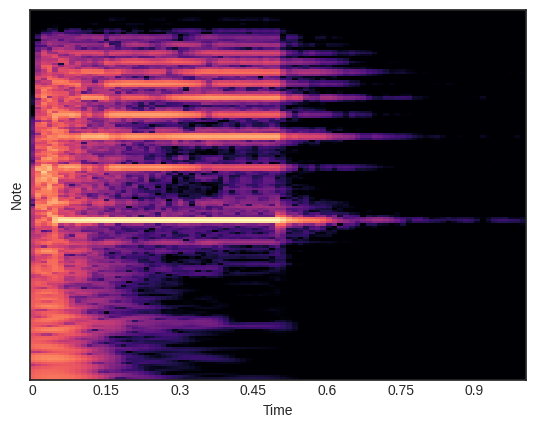

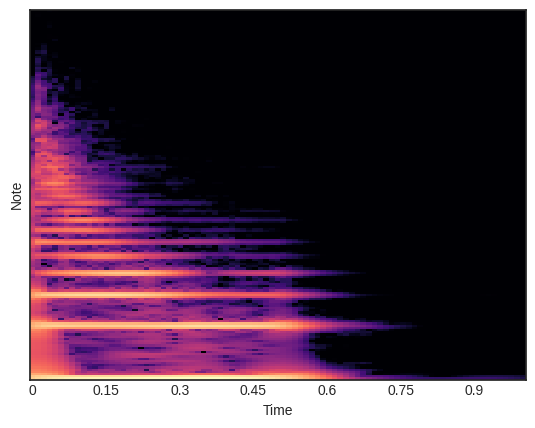

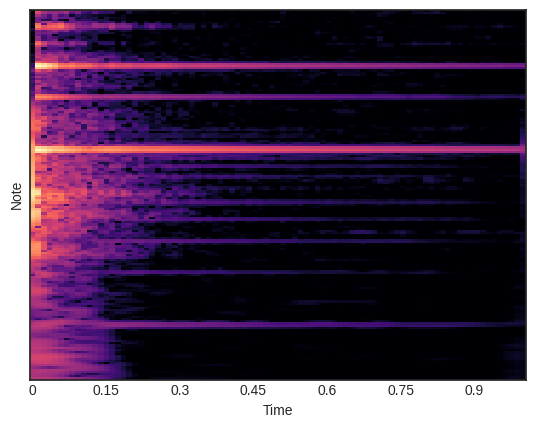

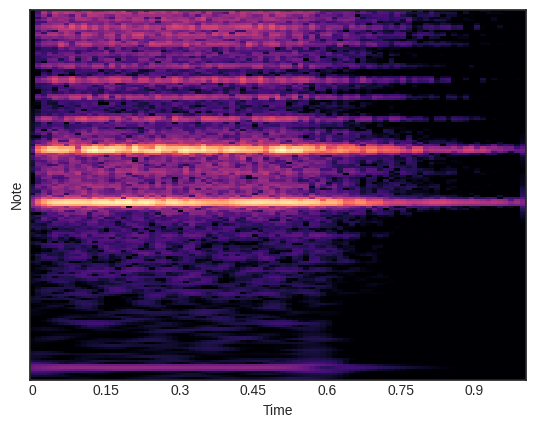

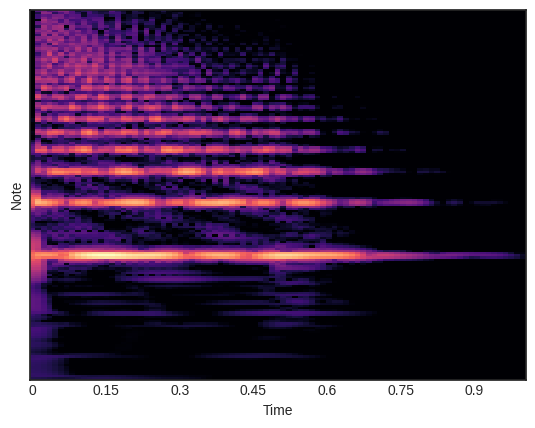

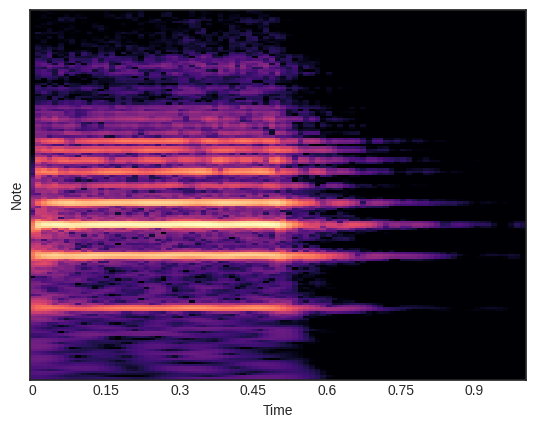

In [ ]:
for i in range(0,len(instruments)*num_notes, num_notes):
    amp_db=librosa.amplitude_to_db(np.abs(audio_cqt[i]),ref=np.max)
    librosa.display.specshow(amp_db,sr=sr,x_axis='time',y_axis='cqt_note')
    plt.show()

* 훈련 데이터와 실험 데이터를 분리

In [ ]:
cqt_np = np.array(audio_cqt, np.float32)
inst_np = np.array(inst,np.int16)

print(cqt_np.shape, inst_np.shape)

(500, 168, 87) (500,)


In [ ]:
cqt_np



*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
cqt_np = cqt_np.reshape((500,168*87))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
scaler.fit(cqt_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y= train_test_split(cqt_np,inst_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616)
(100, 14616)
(400,)
(100,)


## Constant-Q 특징을 이용한 딥러닝 오디오 분류

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [ ]:
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt,np.float32)
cqt_np = cqt_np.reshape((500,168*87))
cqt_array=np.expand_dims(cqt_np,-1)
inst_cat=to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(cqt_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_x.shape)


(400, 14616, 1)
(100, 14616, 1)
(400, 10)
(100, 14616, 1)


In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
    model=Sequential()

    input = Input(shape=(14616,),name='input')
    output= Dense(512,activation='relu',name='hidden1')(input)
    output= Dense(256,activation='relu',name='hidden2')(output)
    output= Dense(128,activation='relu',name='hidden3')(output)
    output= Dense(10,activation='softmax',name='output')(output)


    model = Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    return model

In [ ]:
model= model_build()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14616)]           0         
                                                                 
 hidden1 (Dense)             (None, 512)               7483904   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 7649418 (29.18 MB)
Trainable params: 7649418 (29.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history= model.fit(train_x, train_y, epochs=30,batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 9s 343ms/step - loss: 2.2692 - acc: 0.1063 - val_loss: 2.1336 - val_acc: 0.2125
Epoch 2/30
3/3 [==============================] - 0s 40ms/step - loss: 1.9683 - acc: 0.3969 - val_loss: 1.9576 - val_acc: 0.3125
Epoch 3/30
3/3 [==============================] - 0s 61ms/step - loss: 1.6212 - acc: 0.4938 - val_loss: 1.8990 - val_acc: 0.3000
Epoch 4/30
3/3 [==============================] - 0s 63ms/step - loss: 1.2905 - acc: 0.6375 - val_loss: 1.8480 - val_acc: 0.2625
Epoch 5/30
3/3 [==============================] - 0s 40ms/step - loss: 1.0018 - acc: 0.7594 - val_loss: 2.0267 - val_acc: 0.3875
Epoch 6/30
3/3 [==============================] - 0s 76ms/step - loss: 0.7719 - acc: 0.8406 - val_loss: 2.1402 - val_acc: 0.3500
Epoch 7/30
3/3 [==============================] - 0s 38ms/step - loss: 0.5923 - acc: 0.8687 - val_loss: 2.3114 - val_acc: 0.3875
Epoch 8/30
3/3 [==============================] - 0s 75ms/step - loss: 0.4789 - acc: 0.8750 - va

In [ ]:
def plot_history(history_dict):
    loss= history_dict['loss']
    val_loss=history_dict['val_loss']

    epochs=range(1, len(loss)+1)
    fig = plt.figure(figsize=(14,5))

    ax1=fig.add_subplot(1,2,1)
    ax1.plot(epochs,loss,'b--', label= 'train_loss')
    ax1.plot(epochs,val_loss,'r:', label= 'val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    acc= history_dict['acc']
    val_acc=history_dict['val_acc']

    ax2=fig.add_subplot(1,2,2)
    ax2.plot(epochs,acc,'b--', label= 'train_acc')
    ax2.plot(epochs,val_acc,'r:', label= 'val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.grid()
    ax2.legend()

    plt.show()





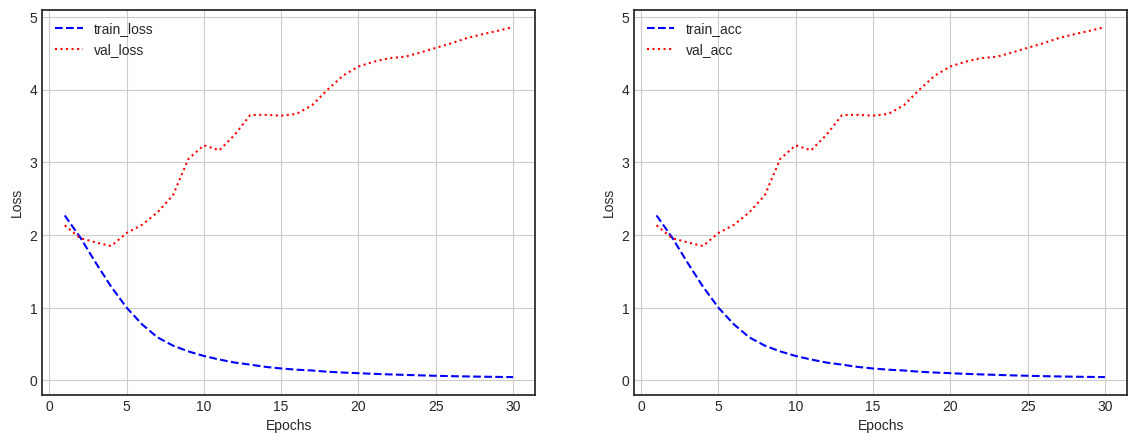

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y)
#  오버피팅이 매우 심함.. 모델이 너무 깊어서..?

4/4 [==============================] - 0s 10ms/step - loss: 3.6483 - acc: 0.4300


[3.648257255554199, 0.4300000071525574]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
# 데이터 형태를 보면 이미지 같음..! 이미지 분류처럼 해보기
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt,np.float32)
cqt_array=np.expand_dims(cqt_np,-1)
inst_cat=to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(cqt_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_x.shape)

(400, 168, 87, 1)
(100, 168, 87, 1)
(400, 10)
(100, 168, 87, 1)


In [ ]:
from keras.layers import Conv2D,MaxPool2D, Flatten

def model_build():
    model=Sequential()

    input = Input(shape=(168,87,1))
    output= Conv2D(128,3, strides=1,padding='same',activation='relu')(input)
    output= MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

    output= Conv2D(256,3, strides=1,padding='same',activation='relu')(output)
    output= MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

    output= Conv2D(512,3, strides=1,padding='same',activation='relu')(output)
    output= MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)


    output=Flatten()(output)
    output=Dense(512,activation='relu')(output)
    output=Dense(256,activation='relu')(output)
    output=Dense(128,activation='relu')(output)

    output= Dense(10,activation='softmax')(output)


    model=Model(inputs=[input],outputs=output)

    model = Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    return model

In [ ]:
model=model_build()
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 168, 87, 1)]      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 168, 87, 128)      1280      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 84, 44, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 84, 44, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 42, 22, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_10 (Conv2D)          (None, 42, 22, 512)       1180

In [ ]:
history=model.fit(train_x,train_y,epochs=10,batch_size=8,validation_split=0.2)


Epoch 1/10
40/40 [==============================] - 6s 44ms/step - loss: 2.2567 - acc: 0.1437 - val_loss: 1.8864 - val_acc: 0.2625
Epoch 2/10
40/40 [==============================] - 2s 41ms/step - loss: 1.8469 - acc: 0.3156 - val_loss: 1.9069 - val_acc: 0.2875
Epoch 3/10
40/40 [==============================] - 2s 40ms/step - loss: 1.3760 - acc: 0.4750 - val_loss: 0.9716 - val_acc: 0.6375
Epoch 4/10
40/40 [==============================] - 2s 39ms/step - loss: 0.7631 - acc: 0.7250 - val_loss: 1.2972 - val_acc: 0.6750
Epoch 5/10
40/40 [==============================] - 2s 40ms/step - loss: 0.6624 - acc: 0.7937 - val_loss: 0.4373 - val_acc: 0.8500
Epoch 6/10
40/40 [==============================] - 2s 40ms/step - loss: 0.2947 - acc: 0.9094 - val_loss: 0.3583 - val_acc: 0.8875
Epoch 7/10
40/40 [==============================] - 2s 43ms/step - loss: 0.2234 - acc: 0.9281 - val_loss: 0.2236 - val_acc: 0.9125
Epoch 8/10
40/40 [==============================] - 2s 42ms/step - loss: 0.2756 - a

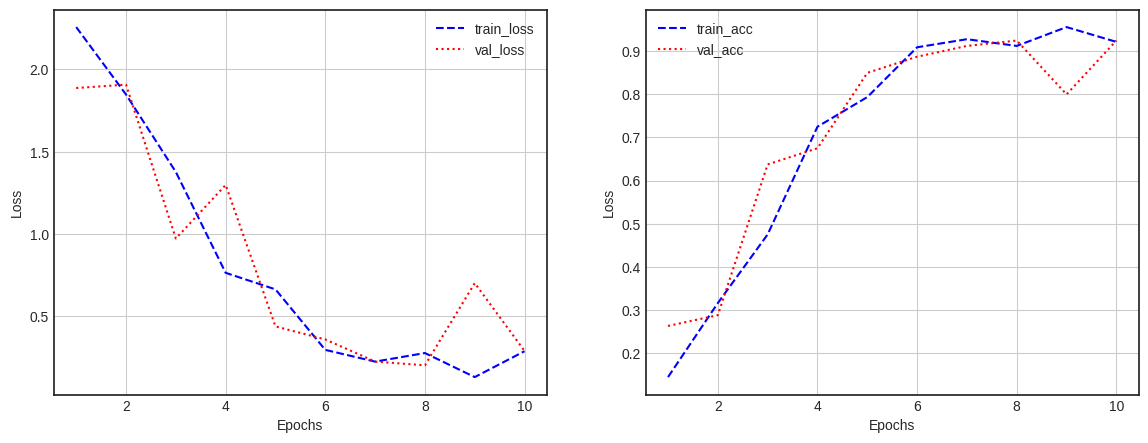

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y) # CNN으로 하니까 성능이 매우 좋아짐!

4/4 [==============================] - 1s 86ms/step - loss: 0.4431 - acc: 0.9100


[0.443109929561615, 0.9100000262260437]



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [ ]:
audio_mfcc=[]
for y in audio[0:2]:
    ret = librosa.feature.mfcc(y=y,sr=sr)
    audio_mfcc.append(ret)
len(audio_mfcc[0]) # audio의 한 행은 88200개의 값을 가지고 있는데 여기서 중요한 특징 20개만 뽑음

20

In [ ]:
audio_mfcc=[]
for y in audio:
    ret = librosa.feature.mfcc(y=y,sr=sr)
    audio_mfcc.append(ret)


<ipython-input-53-b349f7deaade>:6: UserWarning: Glyph 9839 (\N{MUSIC SHARP SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9839 (\N{MUSIC SHARP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


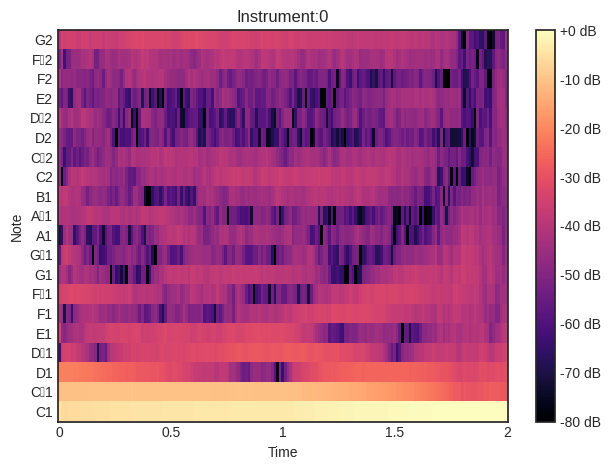

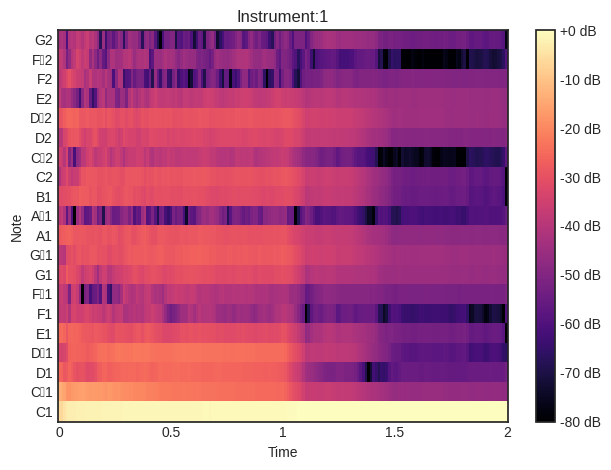

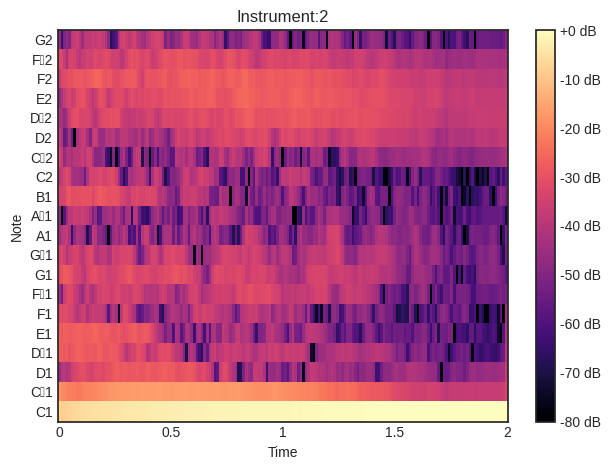

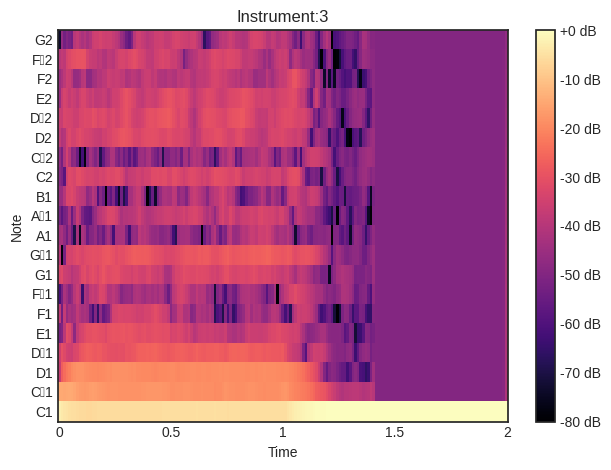

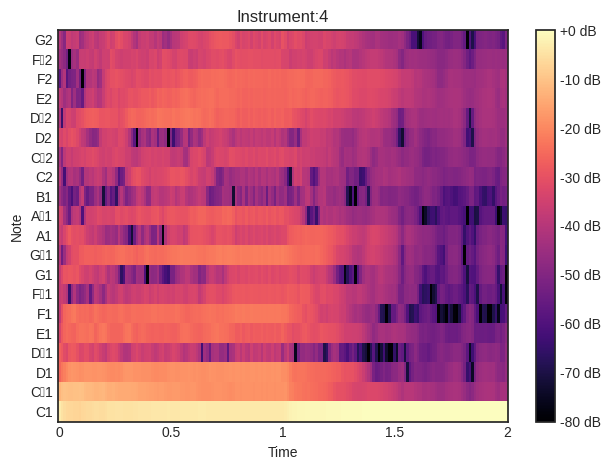

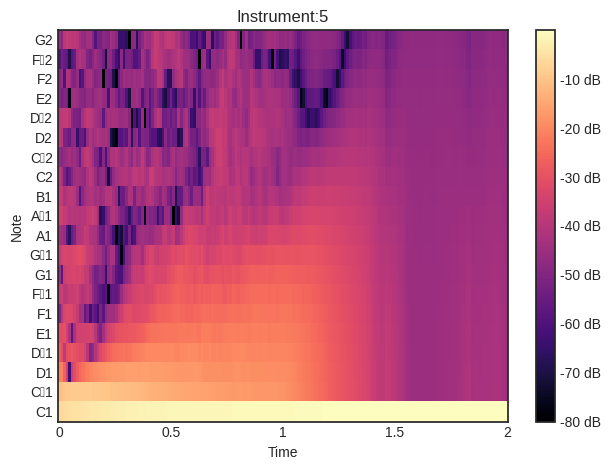

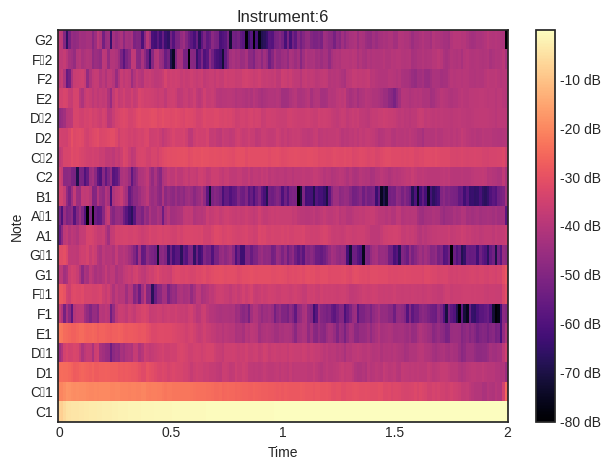

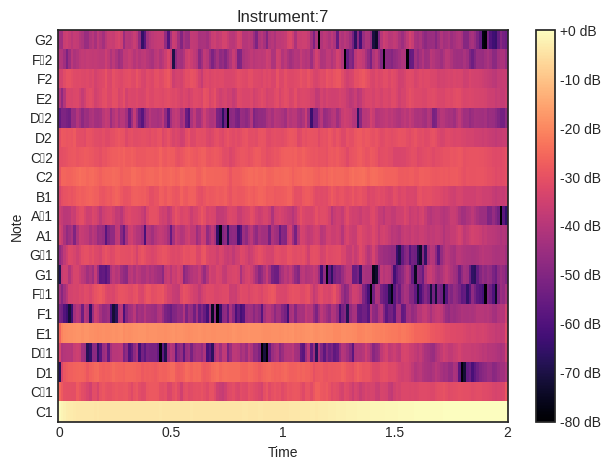

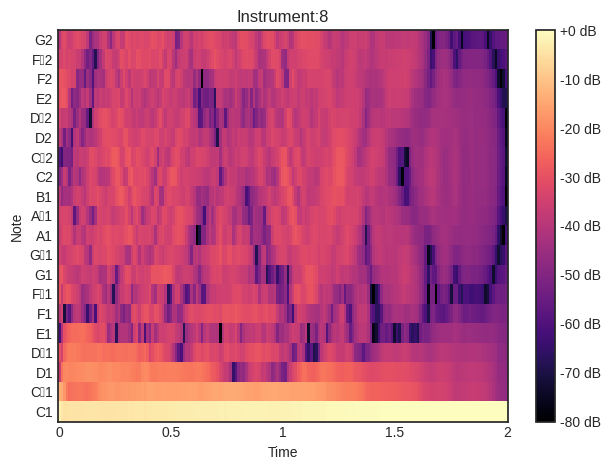

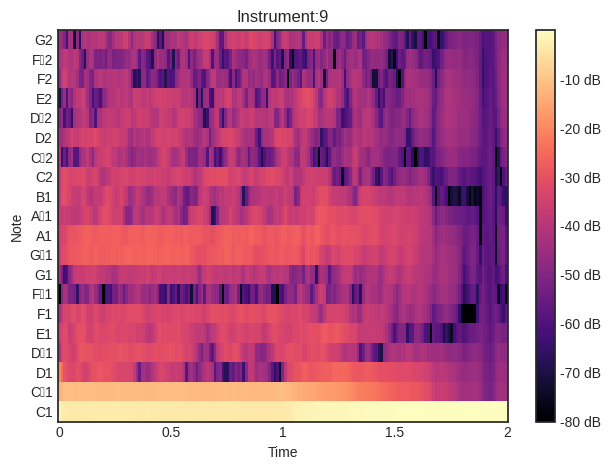

In [ ]:
for i in range(0,len(instruments)*num_notes,num_notes):
    amp_db=librosa.amplitude_to_db(np.abs(audio_mfcc[i]),ref=np.max)
    librosa.display.specshow(amp_db,sr=sr,x_axis='time',y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Instrument:{}'.format(inst[i]))
    plt.tight_layout()
    plt.show()

In [ ]:
mfcc_np= np.array(audio_mfcc,np.float32)
inst_np= np.array(inst,np.int16)

print(mfcc_np.shape,inst_np.shape)

(500, 20, 173) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
mfcc_np=mfcc_np.reshape((500,20*173))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
scaler.fit_transform(mfcc_np)


ValueError: ignored

* 학습 데이터와 실험 데이터를 분리

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(mfcc_np,inst_np,test_size=0.2)

print(train_x.shape)

(400, 20, 173)


## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

In [ ]:
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc,np.float32)
mfcc_np = mfcc_np.reshape((500,20*173))
mfcc_array=np.expand_dims(mfcc_np,-1)
inst_cat=to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(mfcc_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_x.shape)

(400, 3460, 1)
(100, 3460, 1)
(400, 10)
(100, 3460, 1)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
    model=Sequential()

    input = Input(shape=(3460,),name='input')
    output= Dense(512,activation='relu',name='hidden1')(input)
    output= Dense(256,activation='relu',name='hidden2')(output)
    output= Dense(128,activation='relu',name='hidden3')(output)
    output= Dense(10,activation='softmax',name='output')(output)


    model = Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    return model

In [ ]:
model= model_build()
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3460)]            0         
                                                                 
 hidden1 (Dense)             (None, 512)               1772032   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1937546 (7.39 MB)
Trainable params: 1937546 (7.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history= model.fit(train_x, train_y, epochs=30,batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 2s 97ms/step - loss: 276.1735 - acc: 0.1031 - val_loss: 301.8408 - val_acc: 0.1000
Epoch 2/30
3/3 [==============================] - 0s 28ms/step - loss: 296.1152 - acc: 0.1063 - val_loss: 185.0885 - val_acc: 0.2000
Epoch 3/30
3/3 [==============================] - 0s 21ms/step - loss: 168.4757 - acc: 0.1719 - val_loss: 156.8331 - val_acc: 0.1375
Epoch 4/30
3/3 [==============================] - 0s 24ms/step - loss: 133.6167 - acc: 0.2000 - val_loss: 95.5200 - val_acc: 0.2375
Epoch 5/30
3/3 [==============================] - 0s 19ms/step - loss: 76.3967 - acc: 0.2250 - val_loss: 57.2874 - val_acc: 0.2500
Epoch 6/30
3/3 [==============================] - 0s 20ms/step - loss: 44.6983 - acc: 0.2688 - val_loss: 49.2446 - val_acc: 0.3250
Epoch 7/30
3/3 [==============================] - 0s 19ms/step - loss: 34.5746 - acc: 0.3875 - val_loss: 26.5003 - val_acc: 0.3875
Epoch 8/30
3/3 [==============================] - 0s 19ms/step - loss: 18.58

In [ ]:
def plot_history(history_dict):
    loss= history_dict['loss']
    val_loss=history_dict['val_loss']

    epochs=range(1, len(loss)+1)
    fig = plt.figure(figsize=(14,5))

    ax1=fig.add_subplot(1,2,1)
    ax1.plot(epochs,loss,'b--', label= 'train_loss')
    ax1.plot(epochs,val_loss,'r:', label= 'val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    acc= history_dict['acc']
    val_acc=history_dict['val_acc']

    ax2=fig.add_subplot(1,2,2)
    ax2.plot(epochs,acc,'b--', label= 'train_acc')
    ax2.plot(epochs,val_acc,'r:', label= 'val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.grid()
    ax2.legend()

    plt.show()





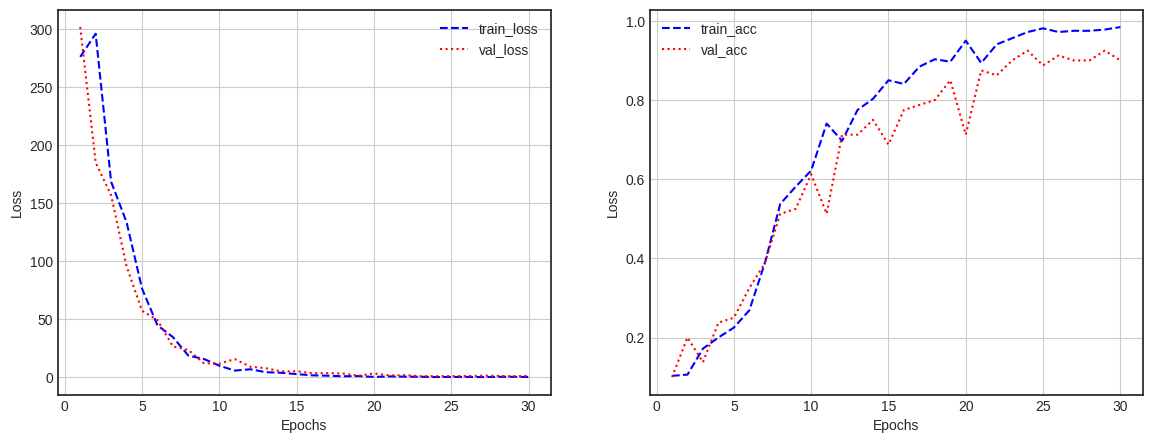

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y)
#  오버피팅이 매우 심함.. 모델이 너무 깊어서..?

4/4 [==============================] - 0s 5ms/step - loss: 1.6564 - acc: 0.8700


[1.656408667564392, 0.8700000047683716]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
# 데이터 형태를 보면 이미지 같음..! 이미지 분류처럼 해보기
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc,np.float32)
mfcc_array=np.expand_dims(mfcc_np,-1)
inst_cat=to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(mfcc_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_x.shape)

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 20, 173, 1)


In [ ]:
from keras.layers import Conv2D,MaxPool2D, Flatten

def model_build():
    model=Sequential()

    input = Input(shape=(20,173,1))
    output= Conv2D(128,3, strides=1,padding='same',activation='relu')(input)
    output= MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

    output= Conv2D(256,3, strides=1,padding='same',activation='relu')(output)
    output= MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

    output= Conv2D(512,3, strides=1,padding='same',activation='relu')(output)
    output= MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)


    output=Flatten()(output)
    output=Dense(512,activation='relu')(output)
    output=Dense(256,activation='relu')(output)
    output=Dense(128,activation='relu')(output)

    output= Dense(10,activation='softmax')(output)


    model=Model(inputs=[input],outputs=output)

    model = Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    return model

In [ ]:
model=model_build()
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 173, 1)]      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 173, 128)      1280      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 10, 87, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 87, 256)       295168    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 44, 256)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 5, 44, 512)        118

In [ ]:
history=model.fit(train_x,train_y,epochs=10,batch_size=8,validation_split=0.2)


Epoch 1/10
40/40 [==============================] - 4s 19ms/step - loss: 7.9685 - acc: 0.1937 - val_loss: 1.6987 - val_acc: 0.4125
Epoch 2/10
40/40 [==============================] - 1s 15ms/step - loss: 1.3950 - acc: 0.5094 - val_loss: 1.1715 - val_acc: 0.5875
Epoch 3/10
40/40 [==============================] - 1s 15ms/step - loss: 0.6363 - acc: 0.7750 - val_loss: 0.3113 - val_acc: 0.9250
Epoch 4/10
40/40 [==============================] - 1s 16ms/step - loss: 0.4397 - acc: 0.8531 - val_loss: 0.7206 - val_acc: 0.8500
Epoch 5/10
40/40 [==============================] - 1s 16ms/step - loss: 0.5596 - acc: 0.8625 - val_loss: 0.6423 - val_acc: 0.8000
Epoch 6/10
40/40 [==============================] - 1s 16ms/step - loss: 0.3830 - acc: 0.8781 - val_loss: 0.3496 - val_acc: 0.8625
Epoch 7/10
40/40 [==============================] - 1s 15ms/step - loss: 0.2302 - acc: 0.9187 - val_loss: 0.6017 - val_acc: 0.8125
Epoch 8/10
40/40 [==============================] - 1s 15ms/step - loss: 0.3248 - a

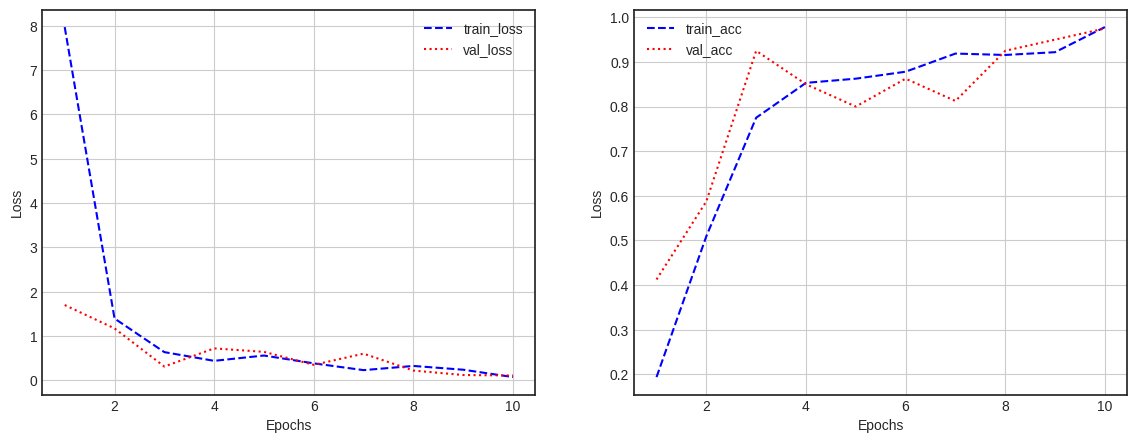

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y) # CNN으로 하니까 성능이 매우 좋아짐!

4/4 [==============================] - 1s 43ms/step - loss: 0.0356 - acc: 0.9800


[0.03562116250395775, 0.9800000190734863]

In [ ]:
## 오디오에서는 어떤 feature을 사용하는지에 따라 성능이 매우 달라진다
## 여기 분류모델에서는 MFCC를 이용해 모델을 돌리니 성능이 가장 좋았다 거의 1에 가까움
